# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Retrieve data

In [2]:
dataset = pd.read_csv('../raw_data/HR_Engagement_Sat_Sales_UpdatedV4.0.csv')

In [3]:
pd.set_option('display.max_columns', None)
dataset.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


# Exploring the dataset

## Dataset shape

In [4]:
dataset.shape

(14999, 62)

## Dataset info

In [5]:
# dataset.info()

## Null values in columns

In [6]:
# Shows columns with at least 1 null value  
pd.set_option('display.max_rows', None)
dataset.isnull().sum()[dataset.isnull().sum() != 0].sort_values(ascending = False)

Rising_Star         14978
Critical            14519
CSR Factor          13286
Men_Leave           10134
Women_Leave          7403
EMP_Sat_OnPrem_1      128
EMP_Sat_OnPrem_2      128
EMP_Sat_OnPrem_3      128
EMP_Sat_OnPrem_4      128
EMP_Sat_OnPrem_5      128
Name                    2
dtype: int64

## Hypothesis 0 : Drop NAME column

In [7]:
print(f"The dataset shape BEFORE Hypothesis 0 : {dataset.shape}\n")
dataset = dataset.drop(columns=['Name'])
print(f"The following column has been dropped : 'Name' \n")
print(f"The dataset shape AFTER Hypothesis 0 : {dataset.shape}")

The dataset shape BEFORE Hypothesis 0 : (14999, 62)

The following column has been dropped : 'Name' 

The dataset shape AFTER Hypothesis 0 : (14999, 61)


## Duplicated rows

In [8]:
#Shows if there are duplicated rows
dataset.duplicated().value_counts()

False    14999
Name: count, dtype: int64

In [9]:
print("There are no duplicated rows in dataset.")

There are no duplicated rows in dataset.


## Count non-NA/null values of dataset

In [10]:
def extract_col_fulfillment(dataframe : pd.DataFrame, 
                            above_below : str = None, 
                            threshold : int = None):
    ''' 
    This function takes as inputs: 
    - a pandas dataframe
    - an optional string parameter (string parameter and integer parameter MUST BE defined if used)
    - an optional integer parameter (string parameter and integer parameter MUST BE defined if used)
    
     This function returns:
     - the percentage of fulfillment (with non NAN/null values)
         of each columns of input dataframe
     - the percentage of fulfillment (with non NAN/null values)
         of each columns of input dataframe (based on above_below and threshold, is specified)
    '''
    
    assert isinstance(dataframe, pd.DataFrame), f"{dataframe} sould be a pandas dataframe"
    if above_below != None :
        assert isinstance(above_below, str), f"{above_below} sould be a string"
        assert above_below in ['below','above'], f"{above_below} sould be either 'below' or 'above'"
    if threshold != None:
        assert isinstance(threshold, int), f"{threshold} sould be an integer"
        
        
    fulfillment = (dataset.count()/len(dataset)*100).sort_values()
    
    if above_below != None and threshold != None:
        if above_below == 'above':
            fulfillment = fulfillment[fulfillment > threshold]
        else:
            fulfillment = fulfillment[fulfillment < threshold]
    
    return fulfillment

In [11]:
# Threshold to extract columns based on fulfillment (in percent) 
# It can be used to extract columns with 'threshold'% of fulfillment (higher or lower -> See 'above_below' variable)
above_below = 'below'
threshold = 90

In [12]:
print(f"Columns whose number of non NAN/null values are {above_below} {threshold}% : \n ")
print(extract_col_fulfillment(dataset,above_below, threshold))

Columns whose number of non NAN/null values are below 90% : 
 
Rising_Star     0.140009
Critical        3.200213
CSR Factor     11.420761
Men_Leave      32.435496
Women_Leave    50.643376
dtype: float64


In [13]:
# Extraction of columns that have fulfillment lower/higher than threshold
low_fulfilled_cols = extract_col_fulfillment(dataset, above_below, threshold)
low_fulfilled_cols_names = low_fulfilled_cols.index.to_list()
low_fulfilled_cols_names

['Rising_Star', 'Critical', 'CSR Factor', 'Men_Leave', 'Women_Leave']

In [14]:
print(f"There are {len(low_fulfilled_cols_names)} columns whose number of non NAN/null values are {above_below} {threshold}% : " )
extract_col_fulfillment(dataset,above_below, threshold)

There are 5 columns whose number of non NAN/null values are below 90% : 


Rising_Star     0.140009
Critical        3.200213
CSR Factor     11.420761
Men_Leave      32.435496
Women_Leave    50.643376
dtype: float64

## Hypothesis 1 : Drop low filled columns

In [15]:
print(f"The dataset shape BEFORE Hypothesis 1 : {dataset.shape}\n")
dataset = dataset.drop(columns=low_fulfilled_cols_names)
print(f"The following columns have been dropped : {low_fulfilled_cols_names} \n")
print(f"The dataset shape AFTER Hypothesis 1 : {dataset.shape}")

The dataset shape BEFORE Hypothesis 1 : (14999, 61)

The following columns have been dropped : ['Rising_Star', 'Critical', 'CSR Factor', 'Men_Leave', 'Women_Leave'] 

The dataset shape AFTER Hypothesis 1 : (14999, 56)


## Dataset description

In [16]:
dataset.describe()

,ID,Will_Relocate,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
count,14999.000000,14999.000000,14999.0,14999.0,14999.0,14999.000000,14871.0,14871.000000,14871.000000,14871.000000,14871.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.499833,3.0,6.0,6.0,0.617321,3.0,2.731962,3.731962,2.731962,3.943649,2.839723,4.367691,3.367691,3.761784,3.973598,4.047670,4.285752,3.761917,3.523835,2.523835,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,18.553904,3.001867,3.014468,3.005800,3.002867,2.141343,2.116274,1.998400,1.990066,2.156010,2.987199,2.144010,2.999067,2.987066,2.979532,1.676245,2.998533,3.005200,3.016934,3406.693246,77.967198,6.399360
std,4329.982679,0.500017,0.0,0.0,0.0,0.193841,0.0,0.681369,0.681369,0.681369,1.244511,0.776054,0.929979,0.929979,0.580834,1.367462,1.703696,1.277772,0.425924,0.851848,0.851848,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,18.987335,1.413788,1.417319,1.418791,1.413008,1.023277,1.010454,0.865389,0.856232,1.032378,1.416793,1.030439,1.406128,1.412314,1.412579,0.865230,1.410058,1.410191,1.412225,1755.742272,7.252848,2.588091
min,1.000000,0.000000,3.0,6.0,6.0,0.400000,3.0,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,60.000000,1.000000
25%,3750.500000,0.000000,3.0,6.0,6.0,0.400000,3.0,3.000000,4.000000,3.000000,4.000000,2.000000,3.000000,2.000000,3.000000,2.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1704.500000,75.000000,5.000000
50%,7500.000000,0.000000,3.0,6.0,6.0,0.800000,3.0,3.000000,4.000000,3.000000,4.000000,3.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,9.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3376.000000,78.000000,7.000000
75%,11249.500000,1.000000,3.0,6.0,6.0,0.800000,3.0,3.000000,4.000000,3.000000,5.000000,3.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,31.000000,4.000000,4.000000,4.000000,4.000000,3

## Check unique values in each column

In [17]:
# Check for constant values <=> standard deviation == 0
zero_std_cols = dataset.std(axis=0, numeric_only=True)[dataset.std(axis=0, numeric_only=True) == 0]
zero_std_cols

Trending Perf             0.0
Talent_Level              0.0
Validated_Talent_Level    0.0
EMP_Sat_OnPrem_1          0.0
dtype: float64

In [18]:
#Check the mean value of the columns with standard deviation == 0
unique_value_cols = dataset.mean(axis=0, numeric_only=True)[zero_std_cols.index]
# unique_value_cols

In [19]:
print(f"There are {len(zero_std_cols)} numerical columns which have a standard deviation equal to 0.\n")
print("These columns can be considered as unique value columns : \n")
print(unique_value_cols)

There are 4 numerical columns which have a standard deviation equal to 0.

These columns can be considered as unique value columns : 

Trending Perf             3.0
Talent_Level              6.0
Validated_Talent_Level    6.0
EMP_Sat_OnPrem_1          3.0
dtype: float64


In [20]:
unique_value_cols_names = unique_value_cols.index.to_list()
unique_value_cols_names

['Trending Perf', 'Talent_Level', 'Validated_Talent_Level', 'EMP_Sat_OnPrem_1']

## Hypothesis 2 : Drop columns with unique single value

In [21]:
print(f"The dataset shape BEFORE Hypothesis 2 : {dataset.shape}\n")
dataset = dataset.drop(columns=unique_value_cols_names)
print(f"The following columns have been dropped : {unique_value_cols_names} \n")
print(f"The dataset shape AFTER Hypothesis 2 : {dataset.shape}")

The dataset shape BEFORE Hypothesis 2 : (14999, 56)

The following columns have been dropped : ['Trending Perf', 'Talent_Level', 'Validated_Talent_Level', 'EMP_Sat_OnPrem_1'] 

The dataset shape AFTER Hypothesis 2 : (14999, 52)


## Histograms

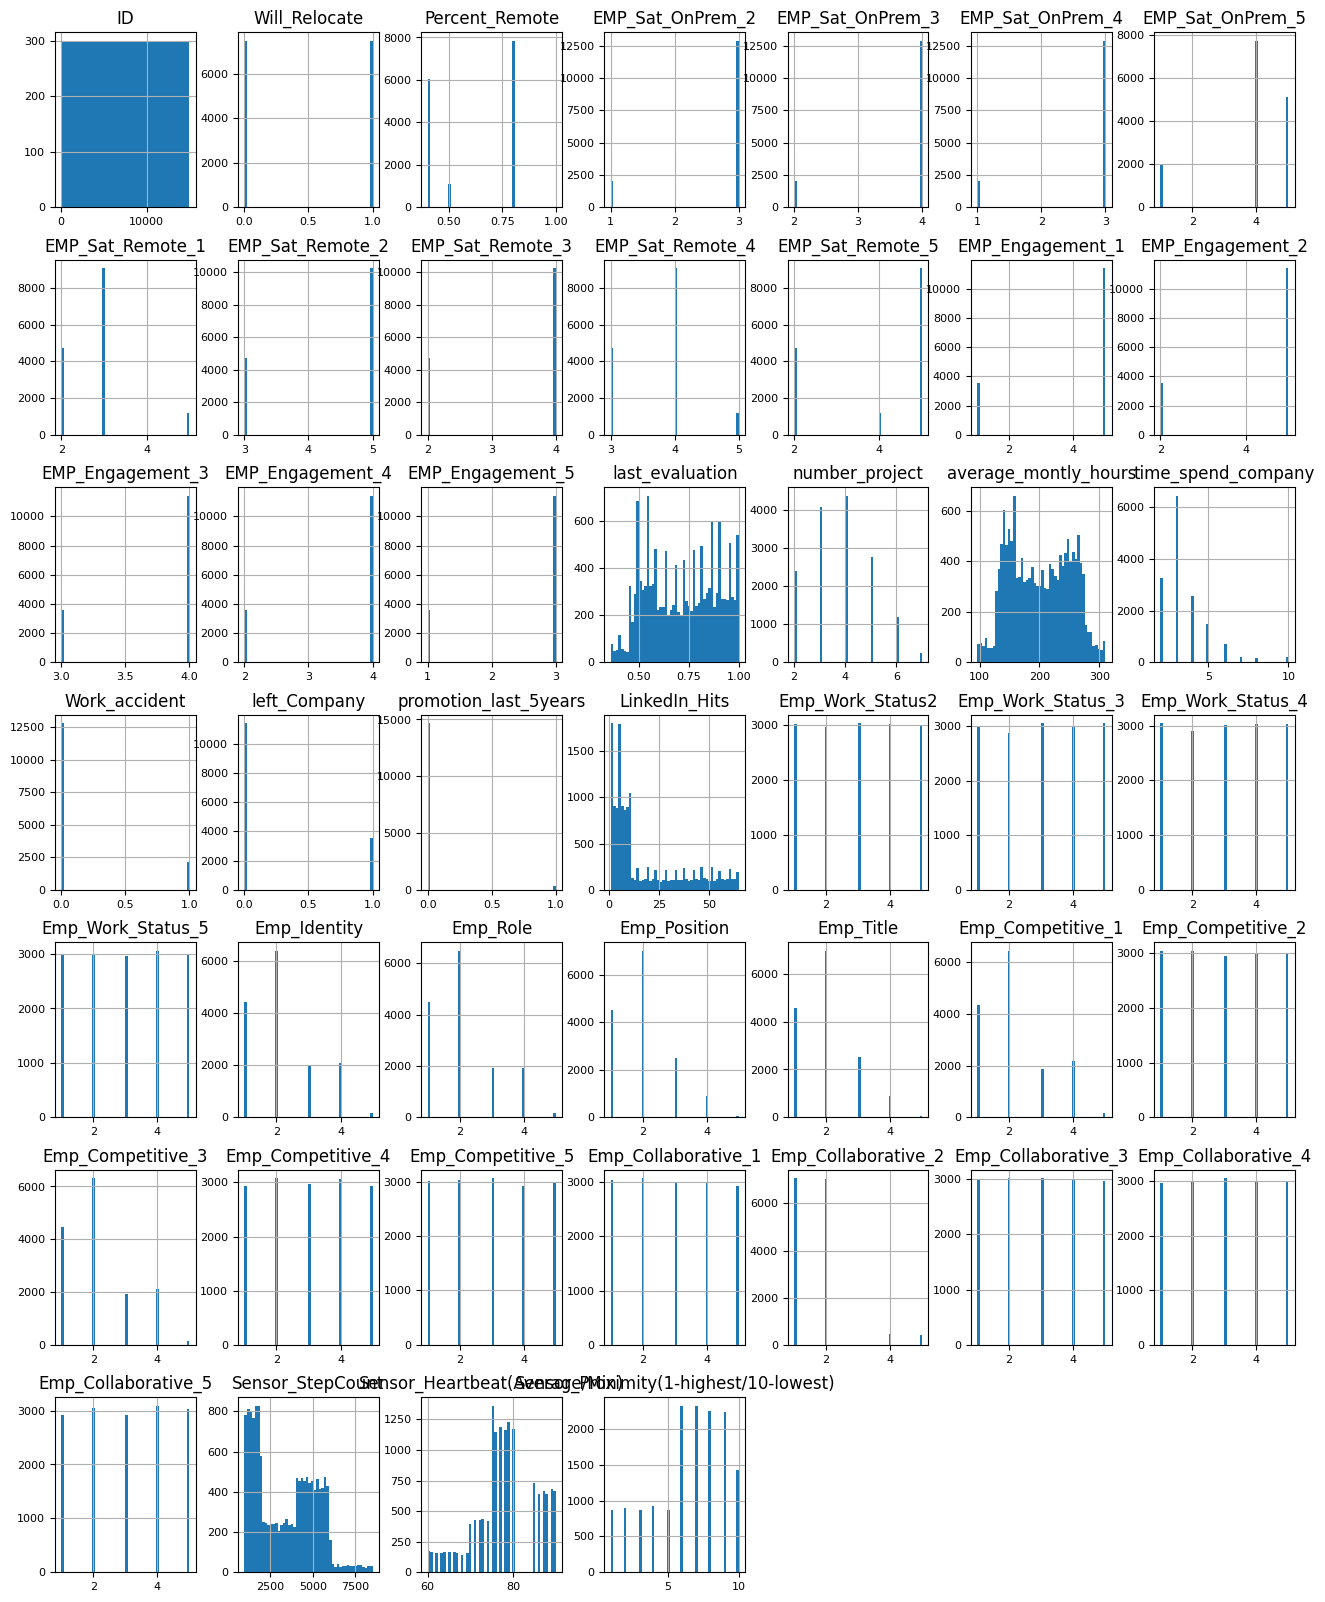

In [22]:
dataset.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

## Correlations